# Perturbative results

#### Import Victor's results

In [2]:
from scipy.io import loadmat

import matplotlib.pyplot as plt

mat_contents = loadmat('../../Matlab/Version_For_Ragheed/Polaron_Mu_0p4142_Nk_10_Self_Energy_Terms.mat')

dJUs_vector = mat_contents['objPol']['tdJ_grid'][0][0][0]
U12 = mat_contents['objPol']['U12'][0][0][0]
sigma0 = mat_contents['objPol']['fill_qm_corrected'][0][0][0]
sigma1 = mat_contents['objPol']['E0_Order_U12_sq_frohlich_only'][0][0][0]
sigma2 = mat_contents['objPol']['E0_Order_U12_sq_Beyond_Frohlich_only'][0][0][0]
en_vector = U12 * sigma0 + sigma1 + sigma2


#### Compute perturbative energies

In [3]:
# Compute the energy of the polaron in the limit of small U12

import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])
UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]

grid = Grid(Lx, Ly)

omega0s = np.zeros(len(dJUs))
omega1s = np.zeros(len(dJUs))
omega2s = np.zeros(len(dJUs))
omegas = np.zeros((len(dJUs), 3))

for count in range(len(dJUs)):
    dJU = dJUs[count]
    params = Params(N, dJU, muU, UIB, cutoff)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    psi0 = gs.psi0(cns)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    verts = vertices(grid, gs, uks, vks, cns, n0)
    pert = perturbative(grid, params, verts, omegaklambda)
    Pert_Energy = pert.perturbative_energy(n0)
    omega0s[count] = Pert_Energy[0]
    omega1s[count] = Pert_Energy[1]
    omega2s[count] = Pert_Energy[2]

#### Plot my results and those of Victor

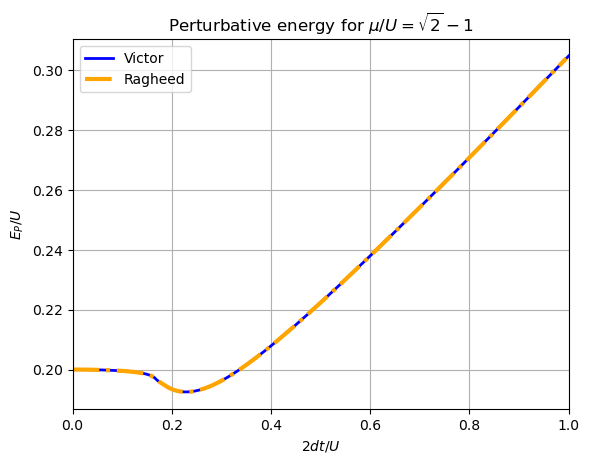

In [16]:
plt.plot(dJUs_vector, en_vector , label='Victor', color='blue', linewidth=2)
plt.plot(dJUs, omega0s + omega1s + omega2s, linestyle='-.', label='Ragheed', color='orange', linewidth=3)
plt.xlabel(r"$2d t/U$")
plt.ylabel(r"$E_P/U$")
plt.title(r"Perturbative energy for $\mu/U = \sqrt{2}-1$")
plt.xlim([0, 1])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Compute the energy of the polaron in the limit of small U12

import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])
UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]

grid = Grid(Lx, Ly)

omega0s = np.zeros(len(dJUs))
omega1s = np.zeros(len(dJUs))
omega2s = np.zeros(len(dJUs))
omegas = np.zeros((len(dJUs), 3))

for count in range(len(dJUs)):
    dJU = dJUs[count]
    params = Params(N, dJU, muU, UIB, cutoff)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    psi0 = gs.psi0(cns)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    verts = vertices(grid, gs, uks, vks, cns, n0)
    pert = perturbative(grid, params, verts, omegaklambda)
    Pert_Energy = pert.perturbative_energy(n0)
    omega0s[count] = Pert_Energy[0]
    omega1s[count] = Pert_Energy[1]
    omega2s[count] = Pert_Energy[2]

# T-Matrix results

### For fixed chemical potential lines

In [30]:
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])

UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]
dJUs = np.linspace(**config["lists"]["dJUs"])

grid = Grid(Lx, Ly)

omegas = []
epsilons = []

for dJU_ind in range(0, len(dJUs)):
    dJU = dJUs[dJU_ind]
    params = Params(N, dJU, muU, UIB, cutoff)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    psi0 = gs.psi0(cns)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    verts = vertices(grid, gs, uks, vks, cns, n0)

    Epol = 0
    self_energy = Self_Energy(Epol, grid, params, verts, omegaklambda)
    omegas.append(self_energy.omega_vec())
    epsilons.append(dJU * self_energy.epsI_vec())
continuum = omegas + dJUs * epsilons
    

# io = IO()
# io.save_to_hdf5_fixed_chemical_potentials(grid, params, dJUs, en_vector, omega0s, omega1s, omega2s, T11, T12, T21, T22, T22_F, SE_SI)

ValueError: operands could not be broadcast together with shapes (200,) (200,700) 

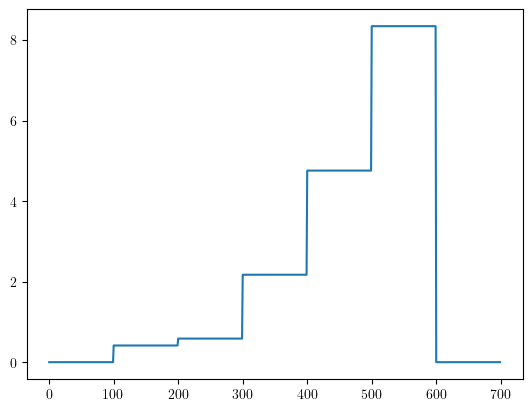

In [32]:
plt.plot(omegas[0], label='dJU = 0')

In [19]:
pc = plt.pcolormesh(dJUs,  , continuum , shading='auto', cmap='PuBuGn'); 
(continuum[0])

SyntaxError: invalid syntax (275964399.py, line 1)

### For fixed density lines

0.185


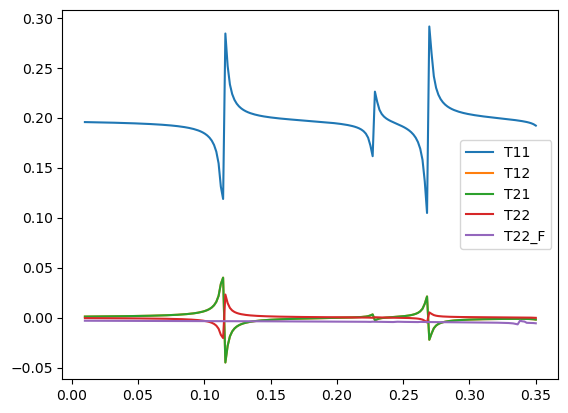

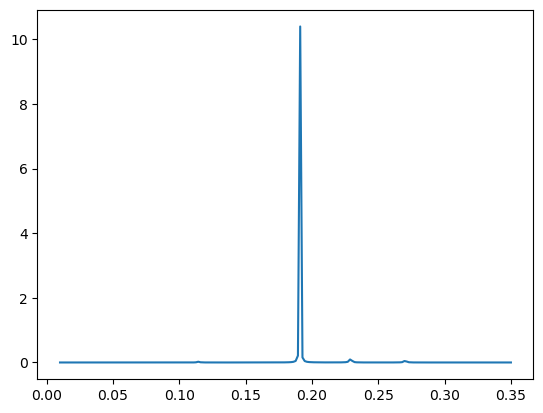

In [2]:
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
dJU = dJUs[0]
muU = eval(config["physics"]["muU"])
UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]

grid = Grid(Lx, Ly)
params = Params(N, dJU, muU, UIB, cutoff)

io = IO()
desired_n0 = 1.0
dJUs, muUs = io.read_from_hdf5_fixed_density_qcorr(grid, params, desired_n0)

en_vector = np.linspace(0.01, 0.35, 200)

omega0s = np.zeros(len(dJUs))
omega1s = np.zeros(len(dJUs))
omega2s = np.zeros(len(dJUs))

SE = np.zeros((7, len(en_vector)), dtype=np.complex128)
SEE = np.zeros((len(en_vector), len(dJUs)), dtype=np.complex128)
T11 = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
T12 = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
T21 = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
T22 = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
T22_F = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
SE_SI = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)

dJU_ind_ = 37

for dJU_ind in range(dJU_ind_, dJU_ind_ + 1):
    dJU = dJUs[dJU_ind]
    print(dJU)
    muU = muUs[dJU_ind]
    params = Params(N, dJU, muU, UIB, cutoff)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    psi0 = gs.psi0(cns)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    verts = vertices(grid, gs, uks, vks, cns, n0)
    pert = perturbative(grid, params, verts, omegaklambda)
    Pert_Energy = pert.perturbative_energy(n0)
    omega0s[dJU_ind] = Pert_Energy[0]
    omega1s[dJU_ind] = Pert_Energy[1]
    omega2s[dJU_ind] = Pert_Energy[2]

    for epol_ind in range(len(en_vector)):
        Epol = en_vector[epol_ind]
        self_energy = Self_Energy(Epol, grid, params, verts, omegaklambda)
        output = self_energy.calculate_self_energy()
        SE[:, epol_ind] = output

    T11[dJU_ind, :] = SE[1, :]
    T12[dJU_ind, :] = SE[2, :]
    T21[dJU_ind, :] = SE[3, :]
    T22[dJU_ind, :] = SE[4, :]
    T22_F[dJU_ind, :] = SE[5, :]
    SE_SI[dJU_ind, :] = SE[6, :]

plt.plot(en_vector, T11[dJU_ind, :], label='T11')
plt.plot(en_vector, T12[dJU_ind, :], label='T12')
plt.plot(en_vector, T21[dJU_ind, :], label='T21')
plt.plot(en_vector, T22[dJU_ind, :], label='T22')
plt.plot(en_vector, T22_F[dJU_ind, :], label='T22_F')
plt.legend()
plt.show()

dOmega = en_vector[1] - en_vector[0]
eta = 0.0001
SpectralFuncs = dOmega * (-2) * np.imag(1./(en_vector - SE_SI[dJU_ind_, :] + 1j * eta))
plt.plot(en_vector, SpectralFuncs)
plt.show()
# io.save_to_hdf5_all_fixed_density(grid, params, desired_n0, dJUs, muUs, en_vector, omega0s, omega1s, omega2s, T11, T12, T21, T22, T22_F, SE_SI)

In [3]:
import numpy as np
xs = np.arange(0, 1, 0.01)
ys = 2 *xs*(sqrt(4+1/(xs**2)+2))
plt.plot(xs, ys)

NameError: name 'sqrt' is not defined

### For different $U_{IB}$ values

In [1]:
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])

UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]

grid = Grid(Lx, Ly)

en_vector = np.linspace(0.001, 0.5, 100)
UIBs = np.linspace(0, 0.5, 100)

omega0s = np.zeros(len(UIBs))
omega1s = np.zeros(len(UIBs))
omega2s = np.zeros(len(UIBs))

SE = np.zeros((7, len(en_vector)), dtype=np.complex128)

T11 = np.zeros((len(UIBs), len(en_vector)), dtype=np.complex128)
T12 = np.zeros((len(UIBs), len(en_vector)), dtype=np.complex128)
T21 = np.zeros((len(UIBs), len(en_vector)), dtype=np.complex128)
T22 = np.zeros((len(UIBs), len(en_vector)), dtype=np.complex128)
T22_F = np.zeros((len(UIBs), len(en_vector)), dtype=np.complex128)
SE_SI = np.zeros((len(UIBs), len(en_vector)), dtype=np.complex128)

dJU = 0.30
for count, UIB in enumerate(UIBs):
    params = Params(N, dJU, muU, UIB, cutoff)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    psi0 = gs.psi0(cns)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    verts = vertices(grid, gs, uks, vks, cns, n0)
    pert = perturbative(grid, params, verts, omegaklambda)
    Pert_Energy = pert.perturbative_energy(n0)
    omega0s[count] = Pert_Energy[0]
    omega1s[count] = Pert_Energy[1]
    omega2s[count] = Pert_Energy[2]

    for epol_ind in range(len(en_vector)):
        Epol = en_vector[epol_ind]
        self_energy = Self_Energy(Epol, grid, params, verts, omegaklambda)
        output = self_energy.calculate_self_energy()
        SE[:, epol_ind] = output

    T11[count, :] = SE[1, :]
    T12[count, :] = SE[2, :]
    T21[count, :] = SE[3, :]
    T22[count, :] = SE[4, :]
    T22_F[count, :] = SE[5, :]
    SE_SI[count, :] = SE[6, :]


# io = IO()
# io.save_to_hdf5_different_UIBs(grid, params, dJUs, en_vector, omega0s, omega1s, omega2s, T11, T12, T21, T22, T22_F, SE_SI)

In [2]:
# Code to save results for different UIBs

import h5py
filename = f'../data/Different_UIBs_dJU_{dJU}_Mu_{muU:.2f}_M_{grid.M}_N_{N}.hdf5'

with h5py.File(filename, 'w') as f:
    f.create_dataset('UIBs', data=UIBs)
    f.create_dataset('en_vector', data=en_vector)
    f.create_dataset('omega0s', data=omega0s)
    f.create_dataset('omega1s', data=omega1s)
    f.create_dataset('omega2s', data=omega2s)
    for i, UIB in enumerate(UIBs):
    # Create a group for this dJU value
        group = f.create_group(f'UIB_{UIB}')

        # Store the arrays in this group
        group.create_dataset('T11', data=T11[i, :])
        group.create_dataset('T12', data=T12[i, :])
        group.create_dataset('T21', data=T21[i, :])
        group.create_dataset('T22', data=T22[i, :])
        group.create_dataset('T22_SE', data=T22_F[i, :])
        group.create_dataset('SE_SI', data=SE_SI[i, :])
    

    # Create attributes for your parameters
    f.attrs['dJU'] = dJU
    f.attrs['muU'] = muU
    f.attrs['Lx'] = grid.Lx
    f.attrs['Ly'] = grid.Ly
    f.attrs['N'] = N

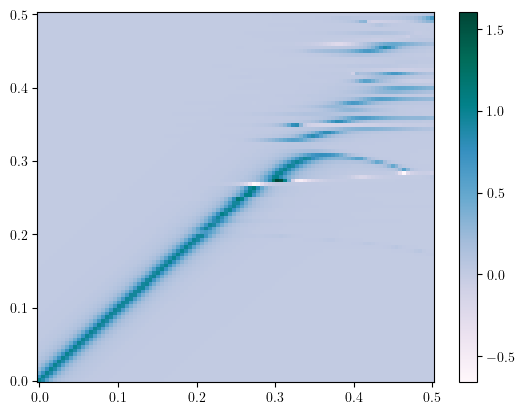

In [18]:
import h5py
dJU, Mu, M, N = 0.17, 0.41, 100, 7
filename = f'../data/Different_UIBs_dJU_{dJU}_Mu_{muU:.2f}_M_{M}_N_{N}.hdf5'
with h5py.File(filename, 'r') as f:
    UIBs = f['UIBs'][:]
    en_vector = f['en_vector'][:]
    omega0s = f['omega0s'][:]
    omega1s = f['omega1s'][:]
    omega2s = f['omega2s'][:]

    T11 = []
    T12 = []
    T21 = []
    T22 = []
    T22_SE = []
    SE_SI = []

    for count, UIB in enumerate(UIBs):
        group = f[f'UIB_{UIB}']
        T11.append(group['T11'][:])
        T12.append(group['T12'][:])
        T21.append(group['T21'][:])
        T22.append(group['T22'][:])
        T22_SE.append(group['T22_SE'][:])
        SE_SI.append(group['SE_SI'][:])
from matplotlib import pyplot as plt
import numpy as np

SpectralFuncs = np.zeros((len(UIBs), len(en_vector)))
dOmega = en_vector[1] - en_vector[0]
eta = 0.01
for count in range(0, len(UIBs)):
    SpectralFuncs[count, :] = dOmega * (-2) * np.imag(1./(en_vector - SE_SI[count] + 1j * eta))
# SpectralFuncs[34, :] = SpectralFuncs[33, :]
# SpectralFuncs[35, :] = SpectralFuncs[36, :]
fig = plt.figure(); 
X, Y = np.meshgrid(UIBs, en_vector)
pc = plt.pcolormesh(X, Y, SpectralFuncs.T , shading='auto', cmap='PuBuGn'); 
cbar = fig.colorbar(pc); 

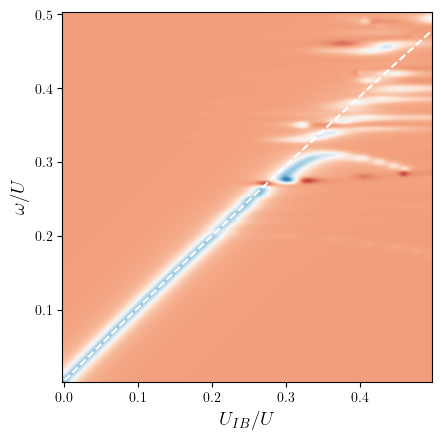

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

plt.rcParams['text.usetex'] = True

threshold = 0.00

filtered_SpectralFuncs = np.where(abs(SpectralFuncs) > threshold, SpectralFuncs, 0)


# Rotate the image by -90 degrees
SpectralFuncs_rot = np.rot90(filtered_SpectralFuncs, 1)

fig, ax = plt.subplots()

# Create the plot
# Set the aspect ratio to the ratio of the number of x points to the number of y points
aspect_ratio = 1
im = ax.imshow(SpectralFuncs_rot, cmap='RdBu', interpolation = 'bicubic', aspect = aspect_ratio)

# Select a subset of dJUs and en_vector for the ticks
num_xticks = 6
num_yticks = 6

xticks = np.linspace(0, SpectralFuncs_rot.shape[1], num_xticks, endpoint=True, dtype=int)
yticks = np.linspace(0, SpectralFuncs_rot.shape[0], num_yticks, endpoint=True, dtype=int)

xticklabels = np.round(np.linspace(min(UIBs), max(UIBs), num_xticks), 2)
yticklabels = np.round(np.linspace(max(en_vector), min(en_vector), num_yticks), 2)

# Format the labels in LaTeX
xticklabels = [r'$\mathrm{{{}}}$'.format(label) for label in xticklabels]
yticklabels = [r'$\mathrm{{{}}}$'.format(label) for label in yticklabels]

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)
ax.set_xlabel(r'$U_{IB}/U$', fontsize=14)
ax.set_ylabel(r'$\omega/U$', fontsize=14)
# # Create an axes divider and add the colorbar to it
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(im, cax=cax)
# Create a secondary y-axis

X, Y = np.meshgrid(UIBs, omega0s + omega1s + omega2s)
# ax2 = ax.twinx()
# Transform the y-coordinates of the plot to match the image coordinates
plot_x = np.interp(UIBs, (UIBs.min(), UIBs.max()), (0, SpectralFuncs_rot.shape[1]-1))
plot_y = SpectralFuncs_rot.shape[0] - 1 - np.interp(omega0s + omega1s + omega2s, (en_vector.min(), en_vector.max()), (0, SpectralFuncs_rot.shape[0]-1))

# Overlay the plot on top of the imshow figure
ax.plot(plot_x, plot_y, linestyle='--', label='Perturbative', color='white', linewidth=1.5)

plt.show()

In [8]:
## Save the figure 
filename = f'../figs/Different_UIBs_dJU_{dJU}_Mu_{muU:.2f}_M_{grid.M}_N_{N}.pdf'
fig.savefig(filename, dpi=300, bbox_inches='tight')

### Computing spectral functions

In [56]:
SpectralFuncs = np.zeros((len(dJUs), len(en_vector)))
dOmega = en_vector[1] - en_vector[0]
eta = 0.01
for dJU_ind in range(0, len(dJUs)):
    dJU = dJUs[dJU_ind]
    SpectralFuncs[dJU_ind, :] = dOmega * (-2) * np.imag(1./(en_vector - SE_SI[dJU_ind, :] + 1j * eta))
fig = plt.figure(); 
X, Y = np.meshgrid(dJUs, en_vector)
pc = plt.pcolormesh(X, Y, SpectralFuncs.T , shading='auto', cmap='PuBuGn'); 
cbar = fig.colorbar(pc); 
plt.plot(dJUs, omega0s + omega1s + omega2s, linestyle='--', label='Perturbative', color='red', linewidth=1.5)
plt.show()


TypeError: list indices must be integers or slices, not tuple

0.17


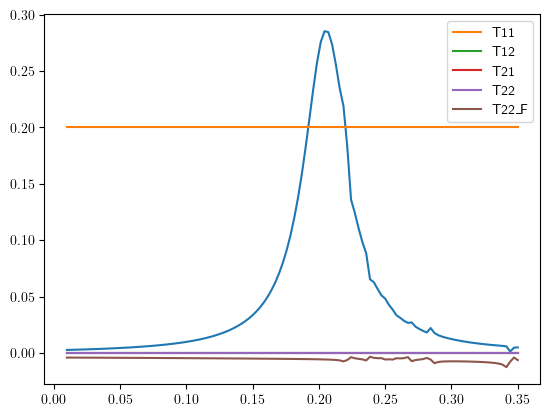

In [65]:
dOmega = en_vector[1] - en_vector[0]
eta = 0.02
dJU_ind = 34
SpectralFunc = dOmega * (-2) * np.imag(1./(en_vector - T11[dJU_ind] + T12[dJU_ind] + T21[dJU_ind] + T22[dJU_ind] + T22_SE[dJU_ind] + 1j * eta))
plt.plot(en_vector, abs(SpectralFunc))
print(dJUs[dJU_ind])
plt.plot(en_vector, np.real(T11[dJU_ind]), label='T11')
plt.plot(en_vector, T12[dJU_ind], label='T12')
plt.plot(en_vector, T21[dJU_ind], label='T21')
plt.plot(en_vector, T22[dJU_ind], label='T22')
plt.plot(en_vector, T22_SE[dJU_ind], label='T22_F')
plt.legend()
plt.show()



40


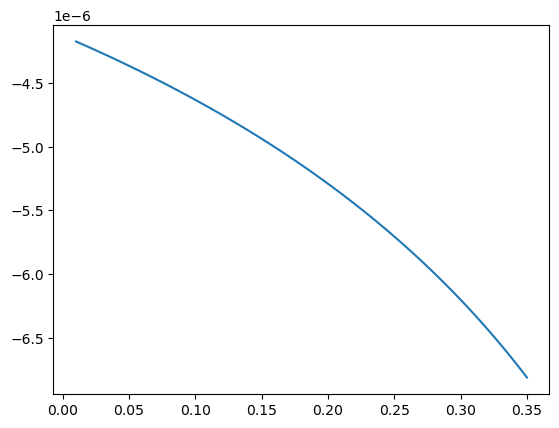

In [7]:

print(dJU_ind)

plt.plot(en_vector,T22_F[2, :], label='T22_F')
# plt.plot(en_vector, SpectralFunc)

# Reading from file

In [20]:
from class_io import IO

UIB, muU, M, N = 0.2, 0.41, 100, 7  # replace with your actual values

io = IO()
dJUs, en_vector, omega0s, omega1s, omega2s, T11, T12, T21, T22, T22_SE, SE_SI = io.read_from_hdf5_all_fixed_chemical_potential(UIB, muU, M, N)


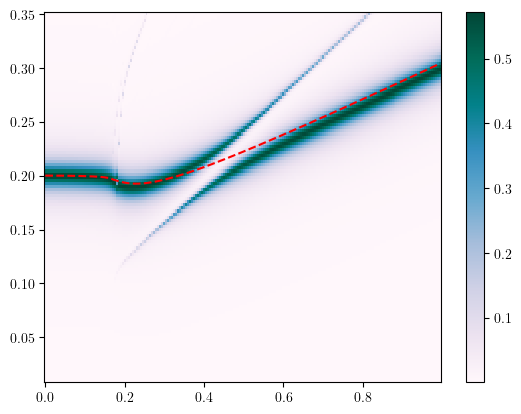

In [23]:
from matplotlib import pyplot as plt
import numpy as np

SpectralFuncs = np.zeros((len(dJUs), len(en_vector)))
dOmega = en_vector[1] - en_vector[0]
eta = 0.01
for dJU_ind in range(0, len(dJUs)):
    dJU = dJUs[dJU_ind]
    SpectralFuncs[dJU_ind, :] = dOmega * (-2) * np.imag(1./(en_vector - (T11[dJU_ind] + T12[dJU_ind] + T21[dJU_ind] + T22[dJU_ind] + T22_SE[dJU_ind])+ 1j * eta))
# SpectralFuncs[34, :] = SpectralFuncs[33, :]
# SpectralFuncs[35, :] = SpectralFuncs[36, :]
fig = plt.figure(); 
X, Y = np.meshgrid(dJUs, en_vector)
pc = plt.pcolormesh(X, Y, SpectralFuncs.T , shading='auto', cmap='PuBuGn'); 
cbar = fig.colorbar(pc); 
plt.plot(dJUs, omega0s + omega1s + omega2s, linestyle='--', label='Perturbative', color='red', linewidth=1.5)
plt.show()

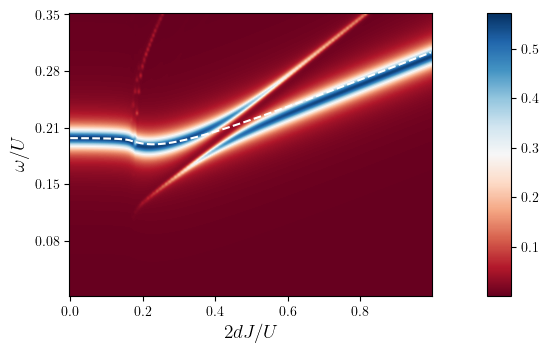

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

plt.rcParams['text.usetex'] = True

threshold = 0.00

filtered_SpectralFuncs = np.where(abs(SpectralFuncs) > threshold, SpectralFuncs, 0)


# Rotate the image by -90 degrees
SpectralFuncs_rot = np.rot90(filtered_SpectralFuncs, 1)

fig, ax = plt.subplots()

# Create the plot
# Set the aspect ratio to the ratio of the number of x points to the number of y points
aspect_ratio = 1.3
im = ax.imshow(SpectralFuncs_rot, cmap='RdBu', interpolation = 'bicubic', aspect = aspect_ratio)

# Select a subset of dJUs and en_vector for the ticks
num_xticks = 6
num_yticks = 6

xticks = np.linspace(0, SpectralFuncs_rot.shape[1], num_xticks, endpoint=True, dtype=int)
yticks = np.linspace(0, SpectralFuncs_rot.shape[0], num_yticks, endpoint=True, dtype=int)

xticklabels = np.round(np.linspace(min(dJUs), max(dJUs), num_xticks), 2)
yticklabels = np.round(np.linspace(max(en_vector), min(en_vector), num_yticks), 2)

# Format the labels in LaTeX
xticklabels = [r'$\mathrm{{{}}}$'.format(label) for label in xticklabels]
yticklabels = [r'$\mathrm{{{}}}$'.format(label) for label in yticklabels]

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)

# # Create an axes divider and add the colorbar to it
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(im, cax=cax)
# Create a secondary y-axis

X, Y = np.meshgrid(dJUs, omega0s + omega1s + omega2s)
# ax2 = ax.twinx()
# Transform the y-coordinates of the plot to match the image coordinates
plot_x = np.interp(dJUs, (dJUs.min(), dJUs.max()), (0, SpectralFuncs_rot.shape[1]-1))
plot_y = SpectralFuncs_rot.shape[0] - 1 - np.interp(omega0s + omega1s + omega2s, (en_vector.min(), en_vector.max()), (0, SpectralFuncs_rot.shape[0]-1))

# Overlay the plot on top of the imshow figure
ax.plot(plot_x, plot_y, linestyle='--', label='Perturbative', color='white', linewidth=1.5)

plt.xlabel(r'$2dJ/U$', fontsize=14)
plt.ylabel(r'$\omega/U$', fontsize=14)

# # Create an axes divider and add the colorbar to it
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.01)
plt.colorbar(im, cax=cax)
plt.show()

filename = f'../figs/spectral_funcs_fixed_chemical_potential_n0_{n0}_M_{M}_N_{N}.pdf'
fig.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
from class_io import IO
import numpy as np
from matplotlib import pyplot as plt
import Codes.Python.src.class_utils as class_utils
eta = 0.001
config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

UIB, muU, M, N = 0.2, 0.41, 100, 7  # replace with your actual values
dJUs = np.linspace(**config["lists"]["dJUs"])
en_vector = np.linspace(0.01, 0.35, 120)

io = IO()
omega0s, omega1s, omega2s, data, UIB, Lx, Ly, muU = io.read_from_hdf5(UIB, muU, M, N)
print(UIB, Lx, Ly, muU, data.keys())

dOmega = en_vector[1] - en_vector[0]

T11_read = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
T12_read = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
T21_read = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
T22_read = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
T22_SE_read = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
SE_SI_read = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
en = np.zeros((len(dJUs), len(en_vector)), dtype=np.complex128)
SpectralFuncs = np.zeros((len(dJUs), len(en_vector)))
for dJU_ind in range(0, len(dJUs)):
    dJU = dJUs[dJU_ind]
    dJU_read = f'dJU_{dJU}'
    # dJU_read = 'dJU_0.5'  # replace with your actual dJU value
    T11_read[dJU_ind, :]  = data[dJU_read]['T11']
    T12_read[dJU_ind, :]  = data[dJU_read]['T12']
    T21_read[dJU_ind, :]  = data[dJU_read]['T21']
    T22_read[dJU_ind, :]  = data[dJU_read]['T22']
    T22_SE_read[dJU_ind, :]  = data[dJU_read]['T22_SE']
    SE_SI_read[dJU_ind, :]  = T11_read[dJU_ind, :] + T12_read[dJU_ind, :] + T21_read[dJU_ind, :] + T22_read[dJU_ind, :] + T22_SE_read[dJU_ind, :]
    en[dJU_ind, :]  = data[dJU_read]['en']
    SpectralFuncs[dJU_ind, :] = dOmega * (-2) * np.imag(1./(en_vector - SE_SI_read[dJU_ind, :] + 1j * eta))


# SpectralFunc = dOmega * (-2) * np.imag(1./(en_vector - SE_SI[dJU_ind, :] + 1j * eta))
# plt.plot(en_vector, SpectralFunc)


dJU_ind = 19
plt.plot(en_vector, T11_read[dJU_ind, :], label='T11')
plt.plot(en_vector, T12_read[dJU_ind, :], label='T12')
plt.plot(en_vector, T21_read[dJU_ind, :], label='T21')
plt.plot(en_vector, T22_read[dJU_ind, :], label='T22')
plt.plot(en_vector, T22_SE_read[dJU_ind, :], label='T22_F')
plt.legend()
plt.show()
plt.plot(en_vector, SpectralFuncs[dJU_ind, :], label='T11')

### Reading 0 columns file

In [1]:
from class_io import IO
import h5py

def read_from_hdf5_all_fixed_density(UIB, n0, M, N):
    filename = f'../data/spectral_funcs_UIB_{UIB:.2f}_n0_{n0}_M_{M}_N_{N}_zero_cols.hdf5'
    with h5py.File(filename, 'r') as f:
        dJU_values = f['dJU_values'][:]
        muU_values = f['muU_values'][:]
        en_values = f['en_values'][:]
        omega0s = f['omega0s'][:]
        omega1s = f['omega1s'][:]
        omega2s = f['omega2s'][:]

        T11_values = []
        T12_values = []
        T21_values = []
        T22_values = []
        T22_SE_values = []
        SE_SI = []

        for dJU in dJU_values:
            SE_SI.append(group['SE_SI'][:])

        return dJU_values, muU_values, en_values, omega0s, omega1s, omega2s, T11_values, T12_values, T21_values, T22_values, T22_SE_values, SE_SI
    
UIB, n0, M, N = 0.2, 1.0, 100, 6  # replace with your actual values

dJUs, muUs, en_vector, omega0s, omega1s, omega2s, T11, T12, T21, T22, T22_SE, SE_SI = read_from_hdf5_all_fixed_density(UIB, n0, M, N)

from matplotlib import pyplot as plt
import numpy as np

SpectralFuncs = np.zeros((len(dJUs), len(en_vector)))
dOmega = en_vector[1] - en_vector[0]
eta = 0.01
for dJU_ind in range(0, len(dJUs)):
    dJU = dJUs[dJU_ind]
    SpectralFuncs[dJU_ind, :] = dOmega * (-2) * np.imag(1./(en_vector - T11[dJU_ind] + T12[dJU_ind] + T21[dJU_ind] + T22[dJU_ind] + T22_SE[dJU_ind] + 1j * eta))
# SpectralFuncs[34, :] = SpectralFuncs[33, :]
# SpectralFuncs[35, :] = SpectralFuncs[36, :]
fig = plt.figure(); 
X, Y = np.meshgrid(dJUs, en_vector)
pc = plt.pcolormesh(X, Y, SpectralFuncs.T , shading='auto', cmap='PuBuGn'); 
cbar = fig.colorbar(pc); 
plt.plot(dJUs, omega0s + omega1s + omega2s, linestyle='--', label='Perturbative', color='red', linewidth=1.5)
plt.show()

KeyError: "Unable to open object (object 'dJU_values' doesn't exist)"

### Reading fixed density

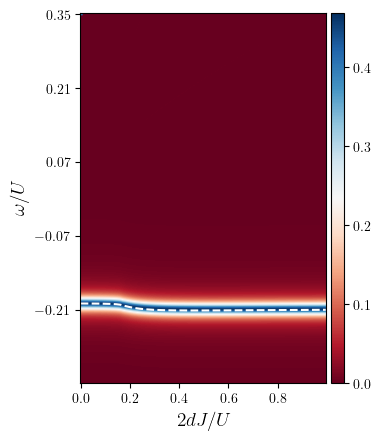

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from class_io import IO

UIB, n0, M, N = -0.2, 1.0, 100, 7  # replace with your actual values

io = IO()
dJUs, muUs, en_vector, omega0s, omega1s, omega2s, T11, T12, T21, T22, T22_SE, SE_SI = io.read_from_hdf5_all_fixed_density(UIB, n0, M, N)

from matplotlib import pyplot as plt
import numpy as np

SpectralFuncs = np.zeros((len(dJUs), len(en_vector)))
dOmega = en_vector[1] - en_vector[0]
eta = 0.01
for dJU_ind in range(0, len(dJUs)):
    dJU = dJUs[dJU_ind]
    SpectralFuncs[dJU_ind, :] = dOmega * (-2) * np.imag(1./(en_vector - SE_SI[dJU_ind ]+ 1j * eta))
    
plt.rcParams['text.usetex'] = True

threshold = 0.0

filtered_SpectralFuncs = np.where(abs(SpectralFuncs) > threshold, SpectralFuncs, 0)


# Rotate the image by -90 degrees
SpectralFuncs_rot = np.rot90(filtered_SpectralFuncs, 1)
fig, ax = plt.subplots()

# Create the plot
# Set the aspect ratio to the ratio of the number of x points to the number of y points
aspect_ratio = 1
im = ax.imshow(SpectralFuncs_rot, cmap='RdBu', interpolation = 'bicubic', aspect = aspect_ratio, vmin=0)


# plt.ylim(280,280)  # Set the y limits of the plot

# Select a subset of dJUs and en_vector for the ticks
num_xticks = 6
num_yticks = 6

xticks = np.linspace(0, SpectralFuncs_rot.shape[1], num_xticks, endpoint=True, dtype=int)
yticks = np.linspace(0, SpectralFuncs_rot.shape[0], num_yticks, endpoint=True, dtype=int)

xticklabels = np.round(np.linspace(min(dJUs), max(dJUs), num_xticks), 2)
yticklabels = np.round(np.linspace(max(en_vector), min(en_vector), num_yticks), 2)

# Format the labels in LaTeX
xticklabels = [r'$\mathrm{{{}}}$'.format(label) for label in xticklabels]
yticklabels = [r'$\mathrm{{{}}}$'.format(label) for label in yticklabels]

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)


# Create a secondary y-axis

X, Y = np.meshgrid(dJUs, omega0s + omega1s + omega2s)
# ax2 = ax.twinx()
# Transform the y-coordinates of the plot to match the image coordinates
plot_x = np.interp(dJUs, (dJUs.min(), dJUs.max()), (0, SpectralFuncs_rot.shape[1]-1))
plot_y = SpectralFuncs_rot.shape[0] - 1 - np.interp(omega0s + omega1s + omega2s, (en_vector.min(), en_vector.max()), (0, SpectralFuncs_rot.shape[0]-1))

# Overlay the plot on top of the imshow figure
ax.plot(plot_x, plot_y, linestyle='--', label='Perturbative', color='white', linewidth=1.5)
# ax.xlim(0, 0.2)
import pandas as pd

filename = '../data/ep_results.csv'
# import table from Polaron_n_1p0.xlsx.csv witout the first row
df = pd.read_csv(filename, skiprows = 1)

# If you want to skip the first row (the original header), you can do this:
data = pd.read_csv(filename, header=None, skiprows=1, delimiter=',')
# choose rows which have the same value in the first column
data = data[data[0] == 9]
plt.plot(4 * data[1], data[2])
Xdata = 2.872447271509876 * data[1]
Ydata = data[2]


X, Y = np.meshgrid(Xdata, Ydata)
# ax2 = ax.twinx()
# Transform the y-coordinates of the plot to match the image coordinates
plot_x = np.interp(Xdata, (Xdata.min(), Xdata.max()), (0, SpectralFuncs_rot.shape[1]*0.8))
plot_y = SpectralFuncs_rot.shape[0]-1 - np.interp(Ydata, (en_vector.min(), en_vector.max()), (0, SpectralFuncs_rot.shape[0]-1))
# print(plot_y)
# Overlay the plot on top of the imshow figure
# ax.plot(plot_x, plot_y, linestyle='--', color='green', linewidth=1.5)
plt.xlabel(r'$2dJ/U$', fontsize=14)
plt.ylabel(r'$\omega/U$', fontsize=14)

# # Create an axes divider and add the colorbar to it
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

filename = f'../figs/spectral_funcs_fixed_density_n0_{n0}_UIB_{UIB}_M_{M}_N_{N}.pdf'
fig.savefig(filename, dpi=300, bbox_inches='tight')

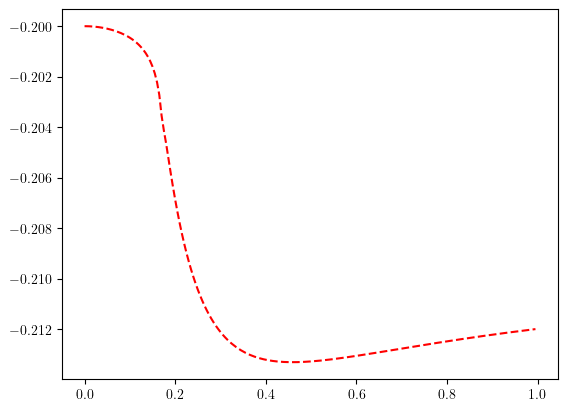

In [34]:
plt.plot(dJUs, omega0s + omega1s + omega2s, linestyle='--', label='Perturbative', color='red', linewidth=1.5)

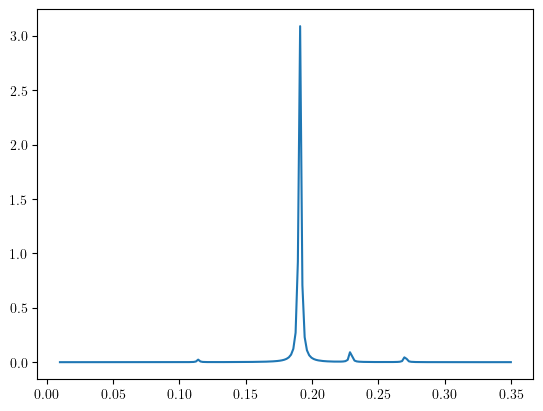

In [3]:
dJU_ind = 37
plt.plot(en_vector, SpectralFuncs[dJU_ind, :], label='T11')

In [51]:
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = 12
Ly = 12

N = 12
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])

UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]
grid = Grid(Lx, Ly)
params = Params(N, 0.1, muU, UIB, cutoff)

from class_io import IO
desired_n0 = 1.0

io = IO()
dJUs, muUs = io.read_from_hdf5_fixed_density_qcorr(grid, params, desired_n0)

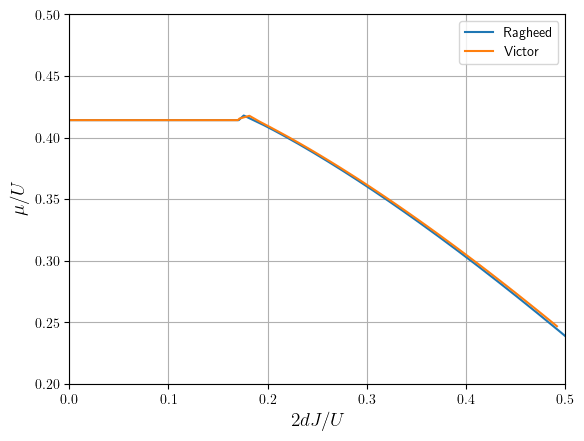

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = '../data/Polaron_n_1p0.csv'
# import table from Polaron_n_1p0.xlsx.csv witout the first row
df = pd.read_csv(filename, skiprows = 1)

# If you want to skip the first row (the original header), you can do this:
data = pd.read_csv(filename, header=None, skiprows=1, delimiter=',')

fig, ax = plt.subplots()
plt.rcParams['text.usetex'] = True
plt.plot(dJUs, muUs, label='Ragheed')
plt.plot(data[0], data[1], label='Victor')
plt.xlabel(r'$2dJ/U$', fontsize=14)
plt.ylabel(r'$\mu/U$', fontsize=14)
plt.xlim(0, 0.5)
plt.ylim(0.2, 0.5)
plt.grid()
plt.legend()

plt.show()
## Save the figure 
filename = f'../figs/Fixed_Density_Lines_n0_{n0}_M_{M}_N_{N}.pdf'
fig.savefig(filename, dpi=300, bbox_inches='tight')

#### Codes to compare for loops to vectorized version

/Users/ragheed/micromamba/envs/boselattice/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ragheed/micromamba/envs/boselattice/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


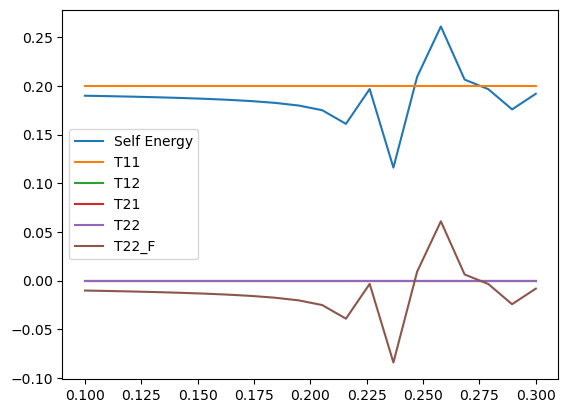

In [4]:
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])
UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]

grid = Grid(Lx, Ly)

en_vector = np.linspace(0.1, 0.3, 20)

dJU = 0.179
params = Params(N, dJU, muU, UIB, cutoff)
gs = groundstate(params)
cns = gs.cns()
n0 = gs.n0(cns)
psi0 = gs.psi0(cns)
exc = excitations(grid, params, gs, cns)
uks, vks, omegaklambda = exc.calculate_matrices()
verts = vertices(grid, gs, uks, vks, cns, n0)

SE = np.zeros((len(en_vector), 7), dtype=np.complex128)

for epol_ind in range(len(en_vector)):
    Epol = en_vector[epol_ind]
    self_energy = Self_Energy(Epol, grid, params, verts, omegaklambda)
    output = self_energy.calculate_self_energy()
    SE[epol_ind] = output
    # print(Epol, SE[epol_ind])
    # pert = perturbative(grid, params, verts, omegaklambda)
    # Pert_Energy = pert.perturbative_energy(n0)
    # omega0s[count] = Pert_Energy[0]
    # omega1s[count] = Pert_Energy[1]
    # omega2s[count] = Pert_Energy[2]
SEs = SE[:, 6]
T11 = SE[:, 1]
T12 = SE[:, 2]
T21 = SE[:, 3]
T22 = SE[:, 4]
T22_F = SE[:, 5]

dOmega = en_vector[1] - en_vector[0]
eta = 0.001
SpectralFunc = dOmega * (-2) * np.imag(1./(en_vector - SEs + 1j * eta))

plt.plot(en_vector, SEs, label='Self Energy')
plt.plot(en_vector, T11, label='T11')
plt.plot(en_vector, T12, label='T12')
plt.plot(en_vector, T21, label='T21')
plt.plot(en_vector, T22, label='T22')
plt.plot(en_vector, T22_F, label='T22_F')
plt.legend()
plt.show()

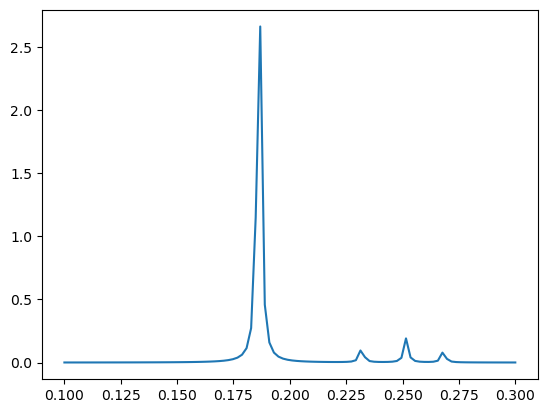

In [10]:
plt.plot(en_vector, SpectralFunc)

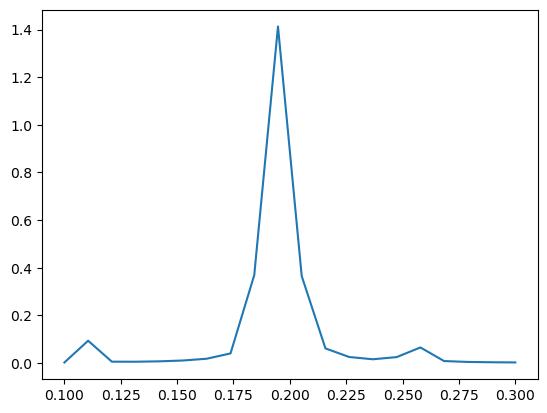

In [38]:
from scipy.linalg import inv
M = grid.M
dim = Lx * Ly * N
KXs = grid.KXs
KYs = grid.KYs
Us = np.zeros((dim, N))

PI1100 = np.zeros((dim, dim), dtype=complex)
Us = np.zeros((dim, dim), dtype=complex)
den_mat = np.zeros((dim, dim), dtype=complex)
en = np.zeros(len(en_vector), dtype=complex)
for epol_ind in range(1, len(en_vector)):
    Epol = en_vector[epol_ind]
    for lambda_ in range(N):
        for kx in range(Lx):
            for ky in range(Ly):
                for lambda1 in range(N):
                    for qx in range(Lx):
                        for qy in range(Ly):
                            indq = lambda1 * Lx * Ly + qx * Ly + qy
                            indk = lambda_ * Lx * Lx + kx * Ly + ky
                            Uelem = UIB * verts.U(kx, ky, lambda_, qx, qy, lambda1)
                            Den11 = Epol - omegaklambda[lambda1, qx, qy] - dJU * self_energy.epsI(KXs[qx], KYs[qy]) + eta * 1j
                            den_mat[indk, indq] = Den11
                            coeff = 1 / M
                            Den22 = Epol - omegaklambda[lambda1, qx, qy] - dJU * self_energy.epsI(KXs[qx], KYs[qy]) + eta * 1j
                            Us[indk, indq] = Uelem
                            PI1100[indk, indq] = coeff * Uelem / (Den11)
                            if lambda1 == 0:
                                PI1100[indk, indq] = 0

    IMat = np.eye(dim)
    inv11 = inv(IMat - PI1100)
    T1100 = inv11 @ Us
    en[epol_ind] = T1100[0,0]
SpectralFunc = dOmega * (-2) * np.imag(1./(en_vector - en + 1j * eta))
plt.plot(en_vector, SpectralFunc)
plt.show()

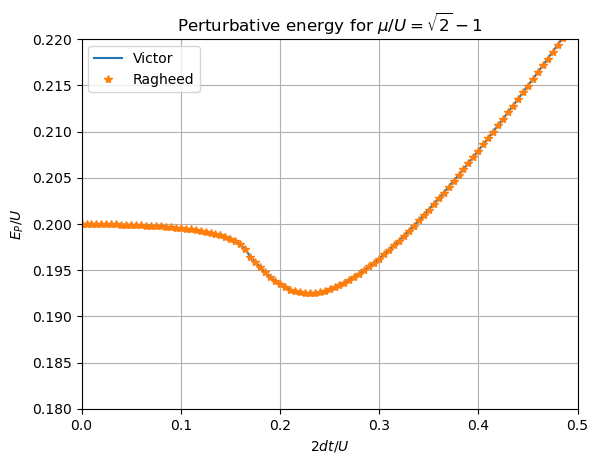

In [13]:
# Plot my results and those of Victor
# Load the data from the text file.
data = np.loadtxt(filename, delimiter=",")

# Split the data into separate arrays.
dJUs, omega0s, omega1s, omega2s = data.T

plt.plot(dJUs_vector, en_vector , label='Victor')
plt.plot(dJUs, omega0s + omega1s + omega2s, '*', label='Ragheed')
plt.xlabel(r"$2d t/U$")
plt.ylabel(r"$E_P/U$")
plt.title(r"Perturbative energy for $\mu/U = \sqrt{2}-1$")
plt.xlim([0, 0.5])
plt.ylim([0.18, 0.22])
plt.grid()
plt.legend()
plt.show()

dJU =  0.17500000000000002 muU =  0.4142578125
dJU =  0.18 muU =  0.41518554687500003
dJU =  0.185 muU =  0.41374511718749996
dJU =  0.19 muU =  0.41196289062499997
dJU =  0.195 muU =  0.4100463867187499
dJU =  0.2 muU =  0.40803222656249993
dJU =  0.20500000000000002 muU =  0.40594482421874994
dJU =  0.21 muU =  0.40381469726562497
dJU =  0.215 muU =  0.401629638671875
dJU =  0.22 muU =  0.39940795898437503
dJU =  0.225 muU =  0.397149658203125
dJU =  0.23 muU =  0.394854736328125
dJU =  0.23500000000000001 muU =  0.39252929687500004
dJU =  0.24 muU =  0.39017333984375
dJU =  0.245 muU =  0.387786865234375
dJU =  0.25 muU =  0.3853729248046875
dJU =  0.255 muU =  0.38292846679687503
dJU =  0.26 muU =  0.3804595947265625
dJU =  0.265 muU =  0.3779632568359375
dJU =  0.27 muU =  0.3754425048828125
dJU =  0.275 muU =  0.37289428710937494
dJU =  0.28 muU =  0.3703216552734375
dJU =  0.28500000000000003 muU =  0.3677276611328125
dJU =  0.29 muU =  0.36510620117187503
dJU =  0.295 muU =  0.

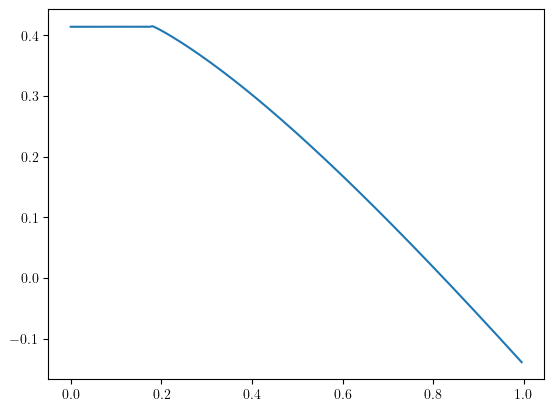

In [6]:
# Compute the energy of the polaron in the limit of small U12
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])
UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]

grid = Grid(Lx, Ly)

muU_qcorr = np.zeros(len(dJUs))
dJUmax = (np.sqrt(2) - 1)**2

def n0_corr(muU, dJU, UIB, cutoff, desired_n0):
    params = Params(N, dJU, muU, UIB, cutoff)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    verts = vertices(grid, gs, uks, vks, cns, n0)
    pert = perturbative(grid, params, verts, omegaklambda)
    eq = pert.sigma0(n0) / UIB
    return eq - desired_n0

def findroot(mu_start, mu_step, dJU, UIB, cutoff, desired_n0):
    n_1 = n0_corr(mu_start, dJU, UIB, cutoff, desired_n0)
    n_2 = n0_corr(mu_start + mu_step, dJU, UIB, cutoff, desired_n0)
    
    if(n_1 * n_2 > 0):
        return findroot(mu_start + mu_step, mu_step, dJU, UIB, cutoff, desired_n0)
    else:
        n_mid = n0_corr(mu_start + mu_step / 2, dJU, UIB, cutoff, desired_n0)
        if(np.abs(n_mid) < 1e-6):
            return mu_start + mu_step / 2
        elif(n_mid * n_1 < 0):
            return findroot(mu_start, mu_step / 2, dJU, UIB, cutoff, desired_n0)
        else:
            return findroot(mu_start + mu_step / 2, mu_step / 2, dJU, UIB, cutoff, desired_n0)

# cutoff = 7
# start with large values of dJU and decrease it 
for count in range(len(dJUs)):
    if(dJUs[count] < dJUmax):
        muU_qcorr[count] = np.sqrt(2) - 1
    else:
        dJU = dJUs[count]
        found = False
        mu_start = muU_qcorr[count] - 0.15
        mu_step = 0.05
        desired_n0 = 1.0
        muU_qcorr[count] = findroot(mu_start, mu_step, dJU, UIB, cutoff, desired_n0)
        print("dJU = ", dJU, "muU = ", muU_qcorr[count])

plt.plot(dJUs, muU_qcorr, label=r"$\omega_{0}$")
plt.show()



In [12]:
import h5py
desired_n0 = 1.0
filename = f'../data/fixed_density_line_chemical_potentials_n0_{desired_n0}_UIB_{UIB:.2f}_M_{grid.M}_N_{N}.hdf5'

with h5py.File(filename, 'w') as f:
    f.create_dataset('mu_qcorr', data=muU_qcorr)
    f.create_dataset('dJU_values', data=dJUs)

    # Create attributes for your parameters
    f.attrs['UIB'] = UIB
    f.attrs['Lx'] = grid.Lx
    f.attrs['Ly'] = grid.Ly
    f.attrs['N'] = N
    f.attrs['n0'] = desired_n0

0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.17500000000000002, 0.18, 0.185, 0.19, 0.195, 0.2, 0.20500000000000002, 0.21, 0.215, 0.22, 0.225, 0.23, 0.23500000000000001, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.28500000000000003, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.34500000000000003, 0.35000000000000003, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41000000000000003, 0.41500000000000004, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47000000000000003, 0.47500000000000003, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.5650000000000001, 0.5700000000000001, 0.5750000000000001, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63,

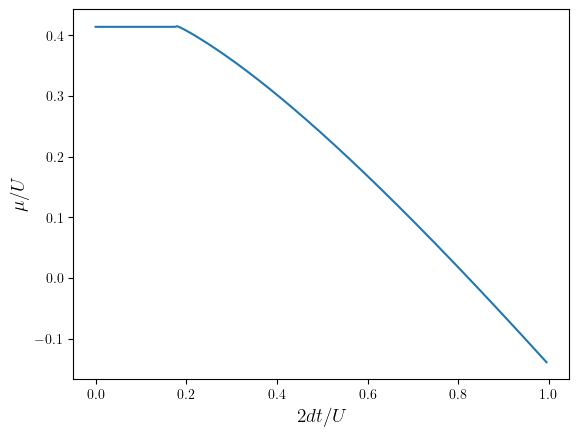

In [84]:
print(", ".join(map(str, dJUs)))
print(", ".join(map(str, muU_qcorr)))
plt.plot(dJUs, muU_qcorr, label=r"$\omega_{0}$")
plt.xlabel(r"$2d t/U$", fontsize = 14)
plt.ylabel(r"$\mu/U$", fontsize=14)
plt.show()

In [11]:

from scipy.linalg import inv
from scipy.io import savemat
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])
UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]

grid = Grid(Lx, Ly)
M = grid.M

dJU = 0.179
params = Params(N, dJU, muU, UIB, cutoff)
gs = groundstate(params)
cns = gs.cns()
n0 = gs.n0(cns)
psi0 = gs.psi0(cns)
exc = excitations(grid, params, gs, cns)
uks, vks, omegaklambda = exc.calculate_matrices()
verts = vertices(grid, gs, uks, vks, cns, n0)

en_vector = np.linspace(0.1, 0.3, 20)
dJU = 0.10099999999999998
Epol = en_vector[8]
print(Epol)
self_energy = Self_Energy(Epol, grid, params, verts, omegaklambda)
eta = 0.0001
dim = grid.M * N
U_mat = UIB * verts.U_mat()
V_mat = UIB * verts.V_mat()
W_mat = UIB * (verts.W_mat() + verts.W_mat().T)
omega_vec = self_energy.omega_vec()
epsI_vec = self_energy.epsI_vec()
Den1 = Epol - omega_vec - dJU * epsI_vec + eta * 1j
Den1 = np.tile(Den1, (dim,1))

omega_mat = omega_vec[:, np.newaxis] + omega_vec[np.newaxis, :]
epsI_grid = self_energy.eps_grid()
Den2 = Epol - omega_mat - dJU * epsI_grid + eta * 1j

IMat = np.eye(len(Den1))

# Den1 = self_energy.delete_elements(Den1, np.arange(1,100), axis = 0)
# U_mat =  self_energy.delete_elements(U_mat, np.arange(1,100), axis = 0)

Den1 = self_energy.delete_elements(Den1, np.arange(1,100), axis = 0)
Den2 = self_energy.delete_elements(Den2, np.arange(1,100), axis = 0)
U_mat = self_energy.delete_elements(U_mat, np.arange(1,100), axis = 0)
V_mat = self_energy.delete_elements(V_mat, np.arange(1,100), axis = 0)
W_mat = self_energy.delete_elements(W_mat, np.arange(1,100), axis = 0)

Pair_Prop_11_12 = np.divide(U_mat, Den1) / M
Pair_Prop_21_22 = np.divide(W_mat, Den1) / M
Pair_Prop_12_SE = np.divide(U_mat, Den2) / M
Pair_Prop_22_SE = np.divide(W_mat, Den2) / M

Pair_Prop_11_12[0:, 0] = 0
Pair_Prop_21_22[0:, 0] = 0
Pair_Prop_12_SE[0:, 0] = 0
Pair_Prop_22_SE[0:, 0] = 0

# Pair_Prop_11_12[0, 0:] = 0
# Pair_Prop_21_22[0, 0:] = 0
# Pair_Prop_12_SE[0, 0:] = 0
# Pair_Prop_22_SE[0, 0:] = 0

IMat = np.eye(len(Den1))

inv11 = inv(IMat - Pair_Prop_11_12)
T_11 = inv11 @ U_mat
T_12 = inv11 @ W_mat
T_21 = W_mat + Pair_Prop_21_22 @ T_11
T_22 = V_mat + Pair_Prop_21_22 @ T_12


inv12 = inv(IMat - Pair_Prop_12_SE)
T_12_SE = inv12 @ W_mat
T_22_SE = V_mat + 0.5 * Pair_Prop_22_SE @ T_12_SE

T22_diag = np.diag(T_22_SE)
Sigma_22 = sum(T22_diag[100:]) / grid.M

# Pair_Prop_11_12[0:99, 1:] = 0

# savemat('mats/T_11.mat', {'T_11': T_11})
# savemat('mats/PP.mat', {'PP': Pair_Prop_11_12})
# savemat('mats/PP2.mat', {'PP2': Pair_Prop_22_SE})
# savemat('mats/PP3.mat', {'PP3': Pair_Prop_12_SE})
# savemat('mats/inv12.mat', {'inv12': inv12})

# savemat('mats/U.mat', {'U': U_mat})
# savemat('mats/V.mat', {'V': V_mat})
# savemat('mats/W.mat', {'W': W_mat})
# savemat('mats/Den1.mat', {'Den1': Den1})
# savemat('mats/Den2.mat', {'Den2': Den2})

# savemat('mats/T_12.mat', {'T_12': T_12})
# savemat('mats/T_21.mat', {'T_21': T_21})
# savemat('mats/T_22.mat', {'T_22': T_22})
# savemat('mats/T_12_SE.mat', {'T_12_SE': T_12_SE})
# savemat('mats/T_22_SE.mat', {'T_22_SE': T_22_SE})
print(Sigma_22)

0.1842105263157895
(-0.005362407040358358-4.961984931316439e-07j)


/Users/ragheed/micromamba/envs/boselattice/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ragheed/micromamba/envs/boselattice/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


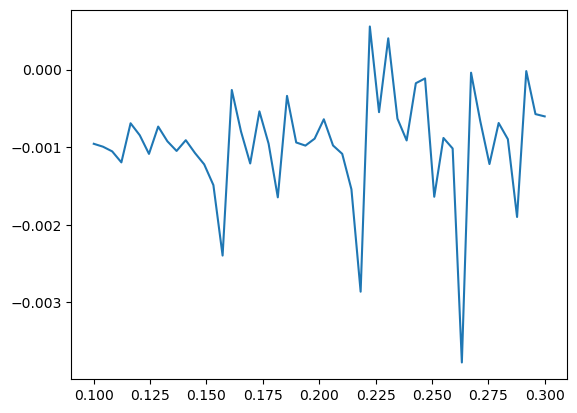

In [59]:
plt.plot(en_vector,T22_F[11, :])

In [13]:
M = grid.M
dim = Lx * Ly * N
KXs = grid.KXs
KYs = grid.KYs
# Us = np.zeros((dim, N))

PI1100 = np.zeros((dim, dim), dtype=complex)
PI1121 = np.zeros((dim, dim), dtype=complex)
PI21 = np.zeros((dim, dim), dtype=complex)
PI12 = np.zeros((dim, dim), dtype=complex)
PI2200 = np.zeros((dim, dim), dtype=complex)
PI22 = np.zeros((dim, dim), dtype=complex)
inv11 = np.zeros((dim, dim), dtype=complex)
inv12 = np.zeros((dim, dim), dtype=complex)
inv22 = np.zeros((dim, dim), dtype=complex)
T1100 = np.zeros((dim, dim), dtype=complex)
T1200 = np.zeros((dim, dim), dtype=complex)
T1121 = np.zeros((dim, dim), dtype=complex)
T1222 = np.zeros((dim, dim), dtype=complex)
T2100 = np.zeros((dim, dim), dtype=complex)
T2200 = np.zeros((dim, dim), dtype=complex)
T12 = np.zeros((dim, dim), dtype=complex)
T22 = np.zeros((dim, dim), dtype=complex)
Us = np.zeros((dim, dim))
Vs = np.zeros((dim, dim))
Ws = np.zeros((dim, dim))
den_mat = np.zeros((dim, dim), dtype=complex)
den_mat2 = np.zeros((dim, dim), dtype=complex)
en = np.zeros(len(en_vector), dtype=complex)
eps_mat = np.zeros((dim, dim), dtype=complex)

for lambda_ in range(N):
    for kx in range(Lx):
        for ky in range(Ly):
            for lambda1 in range(N):
                for qx in range(Lx):
                    for qy in range(Ly):
                        indk = lambda_ * Lx * Lx + kx * Ly + ky
                        indq = lambda1 * Lx * Ly + qx * Ly + qy
                        Uelem = UIB * verts.U(kx, ky, lambda_, qx, qy, lambda1)
                        if indk == 0 and indq == 0:
                            print(Uelem)
                        
                        Velem = UIB * verts.V(kx, ky, lambda_, qx, qy, lambda1)
                        Welem = UIB * (verts.W(kx, ky, lambda_, qx, qy, lambda1) + verts.W(qx, qy, lambda1, kx, ky, lambda_))
                        Den11 = Epol - omegaklambda[lambda1, qx, qy] - dJU * self_energy.epsI(KXs[qx], KYs[qy]) + eta * 1j
                        den_mat[indk, indq] = Den11
                        
                        Den22 = Epol - omegaklambda[lambda1, qx, qy] - dJU * self_energy.epsI(KXs[qx], KYs[qy]) + eta * 1j
                        
                        epsplus = self_energy.epsI(KXs[kx] + KXs[qx], KXs[ky] + KXs[qy])

                        # if lambda1 == 0:
                        #     epsplus = self_energy.epsI(KXs[kx], KXs[ky])

                        # if lambda_ == 0:
                        #     epsplus = self_energy.epsI(KXs[qx], KXs[qy])
                        Den = Epol - omegaklambda[lambda_, kx, ky] - omegaklambda[lambda1, qx, qy] - dJU * epsplus + eta * 1j
                        den_mat2[indk, indq] = Den
                        eps_mat[indk, indq] = epsplus
                        Us[indk, indq] = Uelem
                        # if indk < 2 and indq < 2:
                        #     print("after mat ", Us[0, 0])
                        Vs[indk, indq] = Velem
                        Ws[indk, indq] = Welem
                        coeff = 1.0 / M
                        PI1100[indk, indq] = coeff * (Uelem / Den11)
                        PI1100[indk, indq] = coeff * (Uelem / Den11)
                        PI1121[indk, indq] = coeff * (Uelem / Den22)
                        PI21[indk, indq] = coeff * (Welem / Den22)
                        PI2200[indk, indq] = coeff * (Welem / Den22)
                        PI12[indk, indq] = coeff * (Uelem / Den)
                        PI22[indk, indq] = coeff * (Welem / Den)
                        if lambda1 == 0:
                            # print("indk, indq ", indk, indq)
                            PI1100[indk, indq] = 0
                            PI1121[indk, indq] = 0
                            PI21[indk, indq] = 0
                            PI12[indk, indq] = 0
                            PI2200[indk, indq] = 0
                            PI22[indk, indq] = 0
# print("after for ", Us[0,0])
IMat = np.eye(dim)

inv11 = inv(IMat - PI1100)
inv22 = inv(IMat - PI1121)
T1100 = inv11 @ Us
T1200 = inv11 @ Ws
T1121 = inv22 @ Us
T2100 = Ws + PI21 @ T1121
T1222 = inv22 @ Ws
T2200 = Vs + PI21 @ T1222
inv12 = inv(IMat - PI12)
T12 = inv12 @ Ws
T22 = Vs + 0.5 * PI22 @ T12
T22diag = np.diag(T22)
Sigma22 = 0
for lambda_ in range(1, N):
    for kx in range(Lx):
        for ky in range(Ly):
            indk = lambda_ * M + kx * Lx + ky
            Sigma22 += 1.0 / M * T22diag[indk]
# en[epol_ind] = T1100[0,0]

# savemat('mats/T_11_lo.mat', {'T_11_lo': T1100})
# savemat('mats/PP_lo.mat', {'PP_lo': PI1100})
savemat('mats/U_lo.mat', {'U_lo': Us})
savemat('mats/V_lo.mat', {'V_lo': Vs})
savemat('mats/W_lo.mat', {'W_lo': Ws})
savemat('mats/den_mat_lo.mat', {'den_mat_lo': den_mat})
savemat('mats/den_mat2_lo.mat', {'den_mat2_lo': den_mat2})
savemat('mats/T_12_lo.mat', {'T_12_lo': T1200})
savemat('mats/T_21_lo.mat', {'T_21_lo': T2100})
savemat('mats/T_22_lo.mat', {'T_22_lo': T2200})
savemat('mats/T_22_SE_lo.mat', {'T_22_SE_lo': T22})
print(Sigma22)

0.2000702027095795
(-0.004880384981890821-9.709675326960636e-07j)


In [16]:
def U(kx, ky, lambda_, qx, qy, lambda1, uks, n0, N):
    Ures = 0

    ns = np.arange(0, N, 1)
    Ures = sum(
        uks[:, kx, ky, lambda_]
        * uks[:, qx, qy, lambda1]
    )
    return Ures


from scipy.linalg import inv
from scipy.io import savemat
import numpy as np
import class_utils as class_utils
from class_grid import Grid
from class_params import Params
from class_groundstate import groundstate
from class_excitations import excitations
from class_vertices import vertices
from class_perturbation import perturbative
from class_self_energy import Self_Energy
from class_io import IO
from class_plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = class_utils.create_output_dir()

config = class_utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.linspace(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])
UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]

grid = Grid(Lx, Ly)
M = grid.M

dJU = 0.179
params = Params(N, dJU, muU, UIB, cutoff)
gs = groundstate(params)
cns = gs.cns()
n0 = gs.n0(cns)
psi0 = gs.psi0(cns)
exc = excitations(grid, params, gs, cns)
uks, vks, omegaklambda = exc.calculate_matrices()
verts = vertices(grid, gs, uks, vks, cns, n0)


Us = np.zeros((dim, dim))

for lambda_ in range(N):
    for kx in range(Lx):
        for ky in range(Ly):
            for lambda1 in range(N):
                for qx in range(Lx):
                    for qy in range(Ly):
                        indk = lambda_ * Lx * Lx + kx * Ly + ky
                        indq = lambda1 * Lx * Ly + qx * Ly + qy
                        Uelem = UIB * U(kx, ky, lambda_, qx, qy, lambda1, uks, n0, N)

                        Us[indk, indq] = Uelem


savemat('mats/U_lo.mat', {'U_lo': Us})

print(Sigma22)

(-0.004880384981890821-9.709675326960636e-07j)


In [157]:
M = grid.M
dim = Lx * Ly * N

def U(kx, ky, lambda_, qx, qy, lambda1, uks, n0):
    Ures = 0
    ns = np.arange(0, N, 1)
    Ures = sum( (ns - n0 * (1 - (lambda_ == lambda1) * (lambda_ == 0))) * 
        uks[:, kx, ky, lambda_]
        * uks[:, qx, qy, lambda1]
    )
    return Ures

Us = np.zeros((dim, dim))
eps_mat = np.zeros((dim, dim))
for lambda_ in range(N):
    for kx in range(Lx):
        for ky in range(Ly):
            for lambda1 in range(N):
                for qx in range(Lx):
                    for qy in range(Ly):
                        indk = lambda_ * Lx * Lx + kx * Ly + ky
                        indq = lambda1 * Ly * Ly + qx * Ly + qy
                        Uelem = U(kx, ky, lambda_, qx, qy, lambda1, uks, n0)
                        Us[indq, indk] = Uelem
                        eps_mat[indq, indk] = epsI(grid.KXs[kx] + grid.KXs[qx], grid.KXs[ky] + grid.KXs[qy])
print(Us.shape)

(1200, 1200)


In [104]:
from scipy.io import savemat
U_2d_R = nss * uks_2d.T
U_2d_L = uks_2d
# Save the 2D array 'Us' to a .mat file
savemat('Us.mat', {'Us': Us})
savemat('U_2d.mat', {'U_2d': U_2d})
savemat('U_2d_R.mat', {'U_2d_R': U_2d_R})
savemat('U_2d_L.mat', {'U_2d_L': U_2d_L})

In [ ]:
value = exc.epsI(grid.KXs, grid.KYs)
matrix = np.full((len(grid.KXs), len(grid.KYs)), value)
# print(matrix)
matrix = exc.epsI(grid.KXs[:, None], grid.KYs[None, :])

matrix1 = np.zeros((cutoff, len(grid.KXs), len(grid.KYs)))
for lambda1 in range(cutoff):
    for i in range(len(grid.KXs)):
        for j in range(len(grid.KYs)):
            matrix1[lambda1][i][j] = Epol - omegaklambda[lambda1, i, j] - dJU * exc.epsI(grid.KXs[i], grid.KYs[j]) 
print(matrix1 - matrix)